# TGDS Model with Intermediate Variables

In [1]:
import context
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import src.data.data_preprocessing as util
import src.models.intermediate_lstm_model as lstm

tf.compat.v1.set_random_seed(1)

### Set Hyperparameters

In [2]:
HYPER_PARAMS =  np.load('../../../models/TGDS/training_setup/hyperparameters.npy', allow_pickle=True)
HYPER_PARAMS = HYPER_PARAMS.item()

# add aditional model-spefic hyperparameters
model_hyperparameters = {
    'n_features': 2,               # number of input features
    'd_t': 0.25,                   # current integration factor
    'loss_funcs': ['mse', 'soc'],  # loss functions
    'lambda_mse': 1,               # mse weighting factor
    'lambda_soc': 2,             # approximation loss weighting factor
    'num_repeat': 10,              # repetition factor for each training profile to create more auxiliary data
}

# update hyperparameters
HYPER_PARAMS.update(model_hyperparameters)

### Prepare Training/Validation/Test Data

In [3]:
TRAINING_SETS =  np.load('../../../models/TGDS/training_setup/training_sets.npy', allow_pickle=True)
TRAINING_SETS = TRAINING_SETS.item()

# select correct training set
training_sets = TRAINING_SETS['10A_all']

train_data = []
for set in training_sets:
    set_repeat = [set] * HYPER_PARAMS['num_repeat']
    train_data += set_repeat
    
train_data = np.array(train_data)

# select first profile for validation
validation_profile = [train_data[0]]

# select arbitrary profile for testing
test_profile = np.random.choice(train_data, 1) 

X_train, y_train, scalers_train = util.prepare_intermediate_input(HYPER_PARAMS, train_data, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_validation, y_validation, _ = util.prepare_intermediate_input(HYPER_PARAMS, validation_profile, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_test, y_test, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profile, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])

Input: (93500, 100, 2)  Output/Label: (93500, 2)
Input: (1500, 100, 2)  Output/Label: (1500, 2)
Input: (1850, 100, 2)  Output/Label: (1850, 2)


### Initialize and Train Model

In [4]:
lstm = lstm.Model()
lstm.initialize(HYPER_PARAMS, scalers_train)

Epoch 1/5
 - const: 0.0241
  71/2922 [..............................] - ETA: 16:57 - loss: 0.0135 - mse: 0.2435 - mae: 0.2830 - const: 0.0015


 142/2922 [>.............................] - ETA: 16:38 - loss: 0.0086 - mse: 0.2451 - mae: 0.2831 - const: 0.001


 213/2922 [=>............................] - ETA: 16:14 - loss: 0.0067 - mse: 0.2474 - mae: 0.2843 - const: 0.0014


 284/2922 [=>............................] - ETA: 15:50 - loss: 0.0058 - mse: 0.2512 - mae: 0.2869 - const: 0.001


 355/2922 [==>...........................] - ETA: 15:25 - loss: 0.0052 - mse: 0.2538 - mae: 0.2885 - const: 0.001


 426/2922 [===>..........................] - ETA: 14:59 - loss: 0.0049 - mse: 0.2546 - mae: 0.2889 - const: 0.0008


 497/2922 [====>.........................] - ETA: 14:34 - loss: 0.0046 - mse: 0.2559 - mae: 0.2897 - const: 0.0008


 568/2922 [====>.........................] - ETA: 14:09 - loss: 0.0044 - mse: 0.2571 - mae: 0.2905 - const: 0.001


 639/2922 [=====>........................] - ETA: 13:43 - loss: 0.0042 - mse: 0.2572 - mae: 0.2905 - const: 0.0011


 710/2922 [======>.......................] - ETA: 13:18 - loss: 0.0041 - mse: 0.2562 - mae: 0.2897 - const: 0.0008


 781/2922 [=======>......................] - ETA: 12:52 - loss: 0.0040 - mse: 0.2560 - mae: 0.2894 - const: 0.001


 852/2922 [=======>......................] - ETA: 12:27 - loss: 0.0039 - mse: 0.2573 - mae: 0.2905 - const: 0.0009


 923/2922 [========>.....................] - ETA: 12:01 - loss: 0.0038 - mse: 0.2571 - mae: 0.2903 - const: 0.0009


 994/2922 [=========>....................] - ETA: 11:35 - loss: 0.0037 - mse: 0.2560 - mae: 0.2894 - const: 0.0009


1065/2922 [=========>....................] - ETA: 11:10 - loss: 0.0037 - mse: 0.2561 - mae: 0.2894 - const: 0.0007


1136/2922 [==========>...................] - ETA: 10:44 - loss: 0.0036 - mse: 0.2555 - mae: 0.2890 - const: 0.001


1207/2922 [===========>..................] - ETA: 10:18 - loss: 0.0036 - mse: 0.2556 - mae: 0.2890 - const: 0.0009


1278/2922 [============>.................] - ETA: 9:53 - loss: 0.0035 - mse: 0.2555 - mae: 0.2889 - const: 0.0009


1350/2922 [============>.................] - ETA: 9:27 - loss: 0.0035 - mse: 0.2557 - mae: 0.2890 - const: 0.0007


1422/2922 [=============>................] - ETA: 9:01 - loss: 0.0035 - mse: 0.2557 - mae: 0.2890 - const: 0.0009


1494/2922 [==============>...............] - ETA: 8:35 - loss: 0.0034 - mse: 0.2558 - mae: 0.2890 - const: 0.0011


1566/2922 [===============>..............] - ETA: 8:09 - loss: 0.0034 - mse: 0.2562 - mae: 0.2893 - const: 0.0009


1638/2922 [===============>..............] - ETA: 7:43 - loss: 0.0034 - mse: 0.2564 - mae: 0.2894 - const: 0.0009


1710/2922 [================>.............] - ETA: 7:17 - loss: 0.0034 - mse: 0.2562 - mae: 0.2893 - const: 0.001


1782/2922 [=================>............] - ETA: 6:51 - loss: 0.0033 - mse: 0.2566 - mae: 0.2896 - const: 0.0008


1854/2922 [==================>...........] - ETA: 6:25 - loss: 0.0033 - mse: 0.2568 - mae: 0.2897 - const: 0.0008


1926/2922 [==================>...........] - ETA: 5:59 - loss: 0.0033 - mse: 0.2568 - mae: 0.2897 - const: 0.0007


1998/2922 [===================>..........] - ETA: 5:33 - loss: 0.0033 - mse: 0.2563 - mae: 0.2893 - const: 0.0008


2070/2922 [====================>.........] - ETA: 5:07 - loss: 0.0033 - mse: 0.2564 - mae: 0.2894 - const: 0.0008


2142/2922 [====================>.........] - ETA: 4:41 - loss: 0.0033 - mse: 0.2567 - mae: 0.2896 - const: 0.0009


2214/2922 [=====================>........] - ETA: 4:15 - loss: 0.0032 - mse: 0.2569 - mae: 0.2897 - const: 0.0008


2286/2922 [======================>.......] - ETA: 3:49 - loss: 0.0032 - mse: 0.2567 - mae: 0.2896 - const: 0.001


2358/2922 [=======================>......] - ETA: 3:23 - loss: 0.0032 - mse: 0.2568 - mae: 0.2896 - const: 0.0009


2430/2922 [=======================>......] - ETA: 2:57 - loss: 0.0032 - mse: 0.2566 - mae: 0.2895 - const: 0.0009


2502/2922 [========================>.....] - ETA: 2:31 - loss: 0.0032 - mse: 0.2567 - mae: 0.2896 - const: 0.0008


2574/2922 [=========================>....] - ETA: 2:05 - loss: 0.0032 - mse: 0.2565 - mae: 0.2895 - const: 0.001


2646/2922 [==========================>...] - ETA: 1:39 - loss: 0.0032 - mse: 0.2565 - mae: 0.2894 - const: 0.0009


2718/2922 [==========================>...] - ETA: 1:13 - loss: 0.0032 - mse: 0.2564 - mae: 0.2894 - const: 0.0008


2790/2922 [===========================>..] - ETA: 47s - loss: 0.0032 - mse: 0.2565 - mae: 0.2894 - const: 0.0011


2862/2922 [============================>.] - ETA: 21s - loss: 0.0032 - mse: 0.2564 - mae: 0.2893 - const: 0.0008


2922/2922 [==============================] - 1054s 361ms/step - loss: 0.0031 - mse: 0.2563 - mae: 0.2893
Epoch 2/5
 - const: 0.001
  12/2922 [..............................] - ETA: 15:49 - loss: 0.0028 - mse: 0.2344 - mae: 0.2724 - const: 0.0008


  83/2922 [..............................] - ETA: 16:49 - loss: 0.0028 - mse: 0.2539 - mae: 0.2874 - const: 0.0008


 154/2922 [>.............................] - ETA: 16:30 - loss: 0.0028 - mse: 0.2534 - mae: 0.2870 - const: 0.001


 225/2922 [=>............................] - ETA: 16:07 - loss: 0.0028 - mse: 0.2538 - mae: 0.2873 - const: 0.0009


 296/2922 [==>...........................] - ETA: 15:43 - loss: 0.0028 - mse: 0.2550 - mae: 0.2882 - const: 0.0009


 367/2922 [==>...........................] - ETA: 15:18 - loss: 0.0028 - mse: 0.2542 - mae: 0.2875 - const: 0.0007


 438/2922 [===>..........................] - ETA: 14:52 - loss: 0.0028 - mse: 0.2556 - mae: 0.2885 - const: 0.0008


 509/2922 [====>.........................] - ETA: 14:27 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0009


 580/2922 [====>.........................] - ETA: 14:02 - loss: 0.0028 - mse: 0.2573 - mae: 0.2898 - const: 0.0009


 651/2922 [=====>........................] - ETA: 13:37 - loss: 0.0028 - mse: 0.2572 - mae: 0.2896 - const: 0.001


 722/2922 [======>.......................] - ETA: 13:11 - loss: 0.0028 - mse: 0.2577 - mae: 0.2901 - const: 0.0007


 793/2922 [=======>......................] - ETA: 12:46 - loss: 0.0028 - mse: 0.2576 - mae: 0.2901 - const: 0.0009


 864/2922 [=======>......................] - ETA: 12:20 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0008


 935/2922 [========>.....................] - ETA: 11:55 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0008


1006/2922 [=========>....................] - ETA: 11:29 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0007


1077/2922 [==========>...................] - ETA: 11:04 - loss: 0.0028 - mse: 0.2566 - mae: 0.2893 - const: 0.0009


1148/2922 [==========>...................] - ETA: 10:38 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0009


1219/2922 [===========>..................] - ETA: 10:13 - loss: 0.0028 - mse: 0.2568 - mae: 0.2895 - const: 0.0007


1290/2922 [============>.................] - ETA: 9:47 - loss: 0.0028 - mse: 0.2565 - mae: 0.2893 - const: 0.0008


1362/2922 [============>.................] - ETA: 9:21 - loss: 0.0028 - mse: 0.2567 - mae: 0.2894 - const: 0.0011


1434/2922 [=============>................] - ETA: 8:55 - loss: 0.0028 - mse: 0.2564 - mae: 0.2892 - const: 0.0011


1506/2922 [==============>...............] - ETA: 8:29 - loss: 0.0028 - mse: 0.2561 - mae: 0.2890 - const: 0.001


1578/2922 [===============>..............] - ETA: 8:03 - loss: 0.0028 - mse: 0.2560 - mae: 0.2888 - const: 0.0008


1650/2922 [===============>..............] - ETA: 7:37 - loss: 0.0028 - mse: 0.2562 - mae: 0.2890 - const: 0.0012


1722/2922 [================>.............] - ETA: 7:12 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0009


1794/2922 [=================>............] - ETA: 6:46 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.0008


1866/2922 [==================>...........] - ETA: 6:20 - loss: 0.0028 - mse: 0.2573 - mae: 0.2899 - const: 0.0011


1938/2922 [==================>...........] - ETA: 5:54 - loss: 0.0028 - mse: 0.2573 - mae: 0.2898 - const: 0.0012


2010/2922 [===================>..........] - ETA: 5:28 - loss: 0.0028 - mse: 0.2572 - mae: 0.2898 - const: 0.0009


2082/2922 [====================>.........] - ETA: 5:02 - loss: 0.0028 - mse: 0.2568 - mae: 0.2895 - const: 0.0007


2154/2922 [=====================>........] - ETA: 4:36 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0009


2226/2922 [=====================>........] - ETA: 4:10 - loss: 0.0028 - mse: 0.2568 - mae: 0.2895 - const: 0.0009


2298/2922 [======================>.......] - ETA: 3:44 - loss: 0.0028 - mse: 0.2568 - mae: 0.2895 - const: 0.0009


2370/2922 [=======================>......] - ETA: 3:18 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0012


2442/2922 [========================>.....] - ETA: 2:52 - loss: 0.0028 - mse: 0.2567 - mae: 0.2894 - const: 0.001


2514/2922 [========================>.....] - ETA: 2:26 - loss: 0.0028 - mse: 0.2565 - mae: 0.2893 - const: 0.0008


2586/2922 [=========================>....] - ETA: 2:00 - loss: 0.0028 - mse: 0.2563 - mae: 0.2891 - const: 0.0008


2658/2922 [==========================>...] - ETA: 1:35 - loss: 0.0028 - mse: 0.2562 - mae: 0.2891 - const: 0.001


2730/2922 [===========================>..] - ETA: 1:09 - loss: 0.0028 - mse: 0.2564 - mae: 0.2892 - const: 0.0008


2802/2922 [===========================>..] - ETA: 43s - loss: 0.0028 - mse: 0.2564 - mae: 0.2892 - const: 0.0009


2874/2922 [============================>.] - ETA: 17s - loss: 0.0028 - mse: 0.2565 - mae: 0.2893 - const: 0.0008


2922/2922 [==============================] - 1052s 360ms/step - loss: 0.0028 - mse: 0.2564 - mae: 0.2892
Epoch 3/5
 - const: 0.0007
  24/2922 [..............................] - ETA: 16:43 - loss: 0.0029 - mse: 0.2672 - mae: 0.2979 - const: 0.0009


  95/2922 [..............................] - ETA: 16:45 - loss: 0.0028 - mse: 0.2594 - mae: 0.2915 - const: 0.001


 166/2922 [>.............................] - ETA: 16:25 - loss: 0.0028 - mse: 0.2581 - mae: 0.2905 - const: 0.0009


 237/2922 [=>............................] - ETA: 16:02 - loss: 0.0028 - mse: 0.2590 - mae: 0.2910 - const: 0.001


 308/2922 [==>...........................] - ETA: 15:38 - loss: 0.0028 - mse: 0.2571 - mae: 0.2896 - const: 0.0012


 379/2922 [==>...........................] - ETA: 15:13 - loss: 0.0028 - mse: 0.2576 - mae: 0.2901 - const: 0.0008


 450/2922 [===>..........................] - ETA: 14:48 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0011


 521/2922 [====>.........................] - ETA: 14:22 - loss: 0.0028 - mse: 0.2578 - mae: 0.2902 - const: 0.0006


 592/2922 [=====>........................] - ETA: 13:57 - loss: 0.0028 - mse: 0.2576 - mae: 0.2901 - const: 0.0008


 663/2922 [=====>........................] - ETA: 13:32 - loss: 0.0028 - mse: 0.2559 - mae: 0.2888 - const: 0.0008


 734/2922 [======>.......................] - ETA: 13:06 - loss: 0.0028 - mse: 0.2562 - mae: 0.2891 - const: 0.0007


 805/2922 [=======>......................] - ETA: 12:41 - loss: 0.0028 - mse: 0.2566 - mae: 0.2894 - const: 0.001


 876/2922 [=======>......................] - ETA: 12:15 - loss: 0.0028 - mse: 0.2572 - mae: 0.2899 - const: 0.001


 947/2922 [========>.....................] - ETA: 11:50 - loss: 0.0028 - mse: 0.2571 - mae: 0.2897 - const: 0.0009


1018/2922 [=========>....................] - ETA: 11:24 - loss: 0.0028 - mse: 0.2568 - mae: 0.2896 - const: 0.0007


1089/2922 [==========>...................] - ETA: 10:59 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0006


1160/2922 [==========>...................] - ETA: 10:33 - loss: 0.0028 - mse: 0.2575 - mae: 0.2901 - const: 0.0008


1231/2922 [===========>..................] - ETA: 10:08 - loss: 0.0028 - mse: 0.2573 - mae: 0.2899 - const: 0.0009


1302/2922 [============>.................] - ETA: 9:42 - loss: 0.0028 - mse: 0.2573 - mae: 0.2899 - const: 0.0013


1374/2922 [=============>................] - ETA: 9:17 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.001


1446/2922 [=============>................] - ETA: 8:51 - loss: 0.0028 - mse: 0.2571 - mae: 0.2898 - const: 0.0007


1518/2922 [==============>...............] - ETA: 8:25 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0011


1590/2922 [===============>..............] - ETA: 7:59 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0012


1662/2922 [================>.............] - ETA: 7:33 - loss: 0.0028 - mse: 0.2568 - mae: 0.2894 - const: 0.0008


1734/2922 [================>.............] - ETA: 7:07 - loss: 0.0028 - mse: 0.2566 - mae: 0.2893 - const: 0.0008


1806/2922 [=================>............] - ETA: 6:41 - loss: 0.0028 - mse: 0.2566 - mae: 0.2894 - const: 0.0006


1878/2922 [==================>...........] - ETA: 6:15 - loss: 0.0028 - mse: 0.2568 - mae: 0.2894 - const: 0.0012


1950/2922 [===================>..........] - ETA: 5:49 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.0008


2022/2922 [===================>..........] - ETA: 5:24 - loss: 0.0028 - mse: 0.2567 - mae: 0.2894 - const: 0.0005


2094/2922 [====================>.........] - ETA: 4:58 - loss: 0.0028 - mse: 0.2567 - mae: 0.2894 - const: 0.001


2166/2922 [=====================>........] - ETA: 4:32 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.001


2238/2922 [=====================>........] - ETA: 4:06 - loss: 0.0028 - mse: 0.2566 - mae: 0.2893 - const: 0.001


2310/2922 [======================>.......] - ETA: 3:40 - loss: 0.0028 - mse: 0.2563 - mae: 0.2891 - const: 0.001


2382/2922 [=======================>......] - ETA: 3:14 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.0009


2454/2922 [========================>.....] - ETA: 2:48 - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.0007


2526/2922 [========================>.....] - ETA: 2:22 - loss: 0.0028 - mse: 0.2567 - mae: 0.2894 - const: 0.0006


2598/2922 [=========================>....] - ETA: 1:56 - loss: 0.0028 - mse: 0.2568 - mae: 0.2894 - const: 0.0008


2670/2922 [==========================>...] - ETA: 1:30 - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.0007


2742/2922 [===========================>..] - ETA: 1:04 - loss: 0.0028 - mse: 0.2562 - mae: 0.2890 - const: 0.0009


2814/2922 [===========================>..] - ETA: 38s - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.0008


2886/2922 [============================>.] - ETA: 12s - loss: 0.0028 - mse: 0.2564 - mae: 0.2892 - const: 0.001


2922/2922 [==============================] - 1052s 360ms/step - loss: 0.0028 - mse: 0.2564 - mae: 0.2892
Epoch 4/5
 - const: 0.0007
  36/2922 [..............................] - ETA: 16:56 - loss: 0.0028 - mse: 0.2605 - mae: 0.2919 - const: 0.0006


 107/2922 [>.............................] - ETA: 16:44 - loss: 0.0028 - mse: 0.2657 - mae: 0.2964 - const: 0.0008


 178/2922 [>.............................] - ETA: 16:22 - loss: 0.0028 - mse: 0.2621 - mae: 0.2936 - const: 0.0007


 249/2922 [=>............................] - ETA: 15:59 - loss: 0.0028 - mse: 0.2645 - mae: 0.2954 - const: 0.0008


 320/2922 [==>...........................] - ETA: 15:34 - loss: 0.0028 - mse: 0.2613 - mae: 0.2930 - const: 0.001


 391/2922 [===>..........................] - ETA: 15:09 - loss: 0.0028 - mse: 0.2610 - mae: 0.2928 - const: 0.0008


 462/2922 [===>..........................] - ETA: 14:44 - loss: 0.0028 - mse: 0.2611 - mae: 0.2929 - const: 0.0006


 533/2922 [====>.........................] - ETA: 14:19 - loss: 0.0028 - mse: 0.2610 - mae: 0.2928 - const: 0.001


 604/2922 [=====>........................] - ETA: 13:53 - loss: 0.0028 - mse: 0.2597 - mae: 0.2918 - const: 0.0008


 675/2922 [=====>........................] - ETA: 13:28 - loss: 0.0028 - mse: 0.2602 - mae: 0.2922 - const: 0.0007


 746/2922 [======>.......................] - ETA: 13:02 - loss: 0.0028 - mse: 0.2602 - mae: 0.2922 - const: 0.0009


 817/2922 [=======>......................] - ETA: 12:37 - loss: 0.0028 - mse: 0.2591 - mae: 0.2913 - const: 0.0009


 888/2922 [========>.....................] - ETA: 12:11 - loss: 0.0028 - mse: 0.2586 - mae: 0.2910 - const: 0.001


 959/2922 [========>.....................] - ETA: 11:46 - loss: 0.0028 - mse: 0.2590 - mae: 0.2913 - const: 0.0009


1030/2922 [=========>....................] - ETA: 11:21 - loss: 0.0028 - mse: 0.2582 - mae: 0.2907 - const: 0.0007


1101/2922 [==========>...................] - ETA: 10:55 - loss: 0.0028 - mse: 0.2579 - mae: 0.2903 - const: 0.001


1172/2922 [===========>..................] - ETA: 10:29 - loss: 0.0028 - mse: 0.2577 - mae: 0.2903 - const: 0.0008


1243/2922 [===========>..................] - ETA: 10:04 - loss: 0.0028 - mse: 0.2578 - mae: 0.2903 - const: 0.0009


1315/2922 [============>.................] - ETA: 9:38 - loss: 0.0028 - mse: 0.2576 - mae: 0.2901 - const: 0.0008


1387/2922 [=============>................] - ETA: 9:12 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.0008


1459/2922 [=============>................] - ETA: 8:46 - loss: 0.0028 - mse: 0.2571 - mae: 0.2897 - const: 0.001


1531/2922 [==============>...............] - ETA: 8:20 - loss: 0.0028 - mse: 0.2568 - mae: 0.2895 - const: 0.001


1603/2922 [===============>..............] - ETA: 7:55 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.001


1675/2922 [================>.............] - ETA: 7:29 - loss: 0.0028 - mse: 0.2569 - mae: 0.2896 - const: 0.0008


1747/2922 [================>.............] - ETA: 7:03 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.001


1819/2922 [=================>............] - ETA: 6:37 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.0007


1891/2922 [==================>...........] - ETA: 6:11 - loss: 0.0028 - mse: 0.2567 - mae: 0.2894 - const: 0.0009


1963/2922 [===================>..........] - ETA: 5:45 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0009


2035/2922 [===================>..........] - ETA: 5:19 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0008


2107/2922 [====================>.........] - ETA: 4:53 - loss: 0.0028 - mse: 0.2566 - mae: 0.2893 - const: 0.0009


2179/2922 [=====================>........] - ETA: 4:27 - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.0008


2251/2922 [======================>.......] - ETA: 4:01 - loss: 0.0028 - mse: 0.2568 - mae: 0.2894 - const: 0.001


2323/2922 [======================>.......] - ETA: 3:35 - loss: 0.0028 - mse: 0.2570 - mae: 0.2896 - const: 0.0009


2395/2922 [=======================>......] - ETA: 3:09 - loss: 0.0028 - mse: 0.2571 - mae: 0.2897 - const: 0.0009


2467/2922 [========================>.....] - ETA: 2:43 - loss: 0.0028 - mse: 0.2573 - mae: 0.2898 - const: 0.0008


2539/2922 [=========================>....] - ETA: 2:17 - loss: 0.0028 - mse: 0.2572 - mae: 0.2898 - const: 0.0007


2611/2922 [=========================>....] - ETA: 1:52 - loss: 0.0028 - mse: 0.2574 - mae: 0.2899 - const: 0.0008


2683/2922 [==========================>...] - ETA: 1:26 - loss: 0.0028 - mse: 0.2571 - mae: 0.2897 - const: 0.0009


2755/2922 [===========================>..] - ETA: 1:00 - loss: 0.0028 - mse: 0.2569 - mae: 0.2895 - const: 0.0008


2827/2922 [============================>.] - ETA: 34s - loss: 0.0028 - mse: 0.2567 - mae: 0.2894 - const: 0.001


2899/2922 [============================>.] - ETA: 8s - loss: 0.0028 - mse: 0.2566 - mae: 0.2893 - const: 0.0009


2922/2922 [==============================] - 1053s 360ms/step - loss: 0.0028 - mse: 0.2564 - mae: 0.2892
Epoch 5/5
 - const: 0.0007
  48/2922 [..............................] - ETA: 16:53 - loss: 0.0028 - mse: 0.2597 - mae: 0.2911 - const: 0.001


 119/2922 [>.............................] - ETA: 16:42 - loss: 0.0028 - mse: 0.2592 - mae: 0.2908 - const: 0.0007


 190/2922 [>.............................] - ETA: 16:18 - loss: 0.0028 - mse: 0.2566 - mae: 0.2890 - const: 0.0009


 261/2922 [=>............................] - ETA: 15:55 - loss: 0.0028 - mse: 0.2561 - mae: 0.2887 - const: 0.001


 332/2922 [==>...........................] - ETA: 15:30 - loss: 0.0028 - mse: 0.2553 - mae: 0.2881 - const: 0.0012


 403/2922 [===>..........................] - ETA: 15:05 - loss: 0.0028 - mse: 0.2562 - mae: 0.2888 - const: 0.001


 474/2922 [===>..........................] - ETA: 14:40 - loss: 0.0027 - mse: 0.2574 - mae: 0.2897 - const: 0.0008


 545/2922 [====>.........................] - ETA: 14:15 - loss: 0.0027 - mse: 0.2585 - mae: 0.2905 - const: 0.0008


 616/2922 [=====>........................] - ETA: 13:50 - loss: 0.0027 - mse: 0.2572 - mae: 0.2895 - const: 0.0008


 687/2922 [======>.......................] - ETA: 13:24 - loss: 0.0027 - mse: 0.2566 - mae: 0.2891 - const: 0.0012


 758/2922 [======>.......................] - ETA: 12:59 - loss: 0.0027 - mse: 0.2557 - mae: 0.2885 - const: 0.0008


 829/2922 [=======>......................] - ETA: 12:33 - loss: 0.0027 - mse: 0.2559 - mae: 0.2886 - const: 0.0007


 900/2922 [========>.....................] - ETA: 12:08 - loss: 0.0027 - mse: 0.2551 - mae: 0.2880 - const: 0.001


 971/2922 [========>.....................] - ETA: 11:42 - loss: 0.0027 - mse: 0.2551 - mae: 0.2881 - const: 0.001


1042/2922 [=========>....................] - ETA: 11:17 - loss: 0.0028 - mse: 0.2547 - mae: 0.2877 - const: 0.0009


1113/2922 [==========>...................] - ETA: 10:51 - loss: 0.0027 - mse: 0.2557 - mae: 0.2885 - const: 0.0008


1184/2922 [===========>..................] - ETA: 10:26 - loss: 0.0028 - mse: 0.2563 - mae: 0.2890 - const: 0.0009


1255/2922 [===========>..................] - ETA: 10:00 - loss: 0.0028 - mse: 0.2568 - mae: 0.2893 - const: 0.0007


1327/2922 [============>.................] - ETA: 9:34 - loss: 0.0027 - mse: 0.2567 - mae: 0.2892 - const: 0.0008


1399/2922 [=============>................] - ETA: 9:08 - loss: 0.0028 - mse: 0.2570 - mae: 0.2895 - const: 0.0007


1471/2922 [==============>...............] - ETA: 8:42 - loss: 0.0027 - mse: 0.2569 - mae: 0.2894 - const: 0.0008


1543/2922 [==============>...............] - ETA: 8:16 - loss: 0.0028 - mse: 0.2567 - mae: 0.2893 - const: 0.0008


1615/2922 [===============>..............] - ETA: 7:51 - loss: 0.0028 - mse: 0.2566 - mae: 0.2892 - const: 0.0008


1687/2922 [================>.............] - ETA: 7:25 - loss: 0.0028 - mse: 0.2564 - mae: 0.2890 - const: 0.001


1759/2922 [=================>............] - ETA: 6:59 - loss: 0.0028 - mse: 0.2566 - mae: 0.2892 - const: 0.0007


1831/2922 [=================>............] - ETA: 6:33 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.0006


1903/2922 [==================>...........] - ETA: 6:07 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.001


1975/2922 [===================>..........] - ETA: 5:41 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.0009


2047/2922 [====================>.........] - ETA: 5:15 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.001


2119/2922 [====================>.........] - ETA: 4:49 - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.0009


2191/2922 [=====================>........] - ETA: 4:23 - loss: 0.0028 - mse: 0.2567 - mae: 0.2893 - const: 0.0008


2263/2922 [======================>.......] - ETA: 3:57 - loss: 0.0028 - mse: 0.2563 - mae: 0.2890 - const: 0.0009


2335/2922 [======================>.......] - ETA: 3:31 - loss: 0.0028 - mse: 0.2562 - mae: 0.2890 - const: 0.0008


2407/2922 [=======================>......] - ETA: 3:05 - loss: 0.0028 - mse: 0.2563 - mae: 0.2890 - const: 0.0009


2479/2922 [========================>.....] - ETA: 2:39 - loss: 0.0028 - mse: 0.2563 - mae: 0.2890 - const: 0.001


2551/2922 [=========================>....] - ETA: 2:13 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.0009


2623/2922 [=========================>....] - ETA: 1:47 - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.0011


2695/2922 [==========================>...] - ETA: 1:21 - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.0009


2767/2922 [===========================>..] - ETA: 55s - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.0012


2839/2922 [============================>.] - ETA: 29s - loss: 0.0028 - mse: 0.2565 - mae: 0.2892 - const: 0.001


2911/2922 [============================>.] - ETA: 3s - loss: 0.0028 - mse: 0.2564 - mae: 0.2891 - const: 0.001


2922/2922 [==============================] - 1053s 360ms/step - loss: 0.0028 - mse: 0.2564 - mae: 0.2891
Training time: 5268.057s


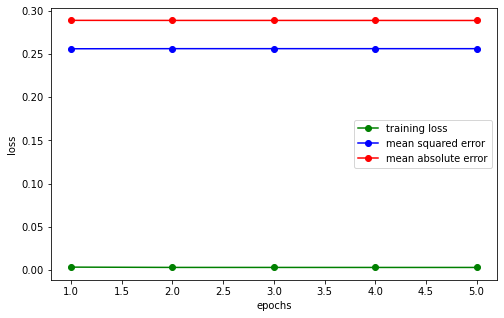

INFO:tensorflow:Assets written to: ../../../models/TGDS/8685\assets


In [5]:
_, fig = lstm.train(X_train, y_train, scalers_train)

# save model and hyperparameters
MODEL_ID = str(np.random.randint(10000))

lstm.model.save('../../../models/TGDS/' + str(MODEL_ID))
np.save('../../../models/TGDS/' + str(MODEL_ID) + '/hyperparameters', HYPER_PARAMS)
fig.savefig('../../../reports/figures/theory_guided_const-' + str(MODEL_ID) + '-learning_curve.png')

### Test Model

Validation Profile: ['Profile 10A']
Test Profile: ['Profile 10A Run 070618']
2922/2922 [==============================] - 165s 56ms/step
Prediction time on Training Set:  165.141s
47/47 [==============================] - 3s 55ms/step
Prediction time on Validation Set:  2.644s
58/58 [==============================] - 3s 55ms/step
Prediction time on Test Set:  3.248s
###########################################################
            Training    Validation     Test
--------  ----------  ------------  -------
MSE (μV)    113.5         256       60.6
MAE (V)       0.0099        0.0158   0.0076
MaxE (V)      0.0245        0.0245   0.0127
###########################################################


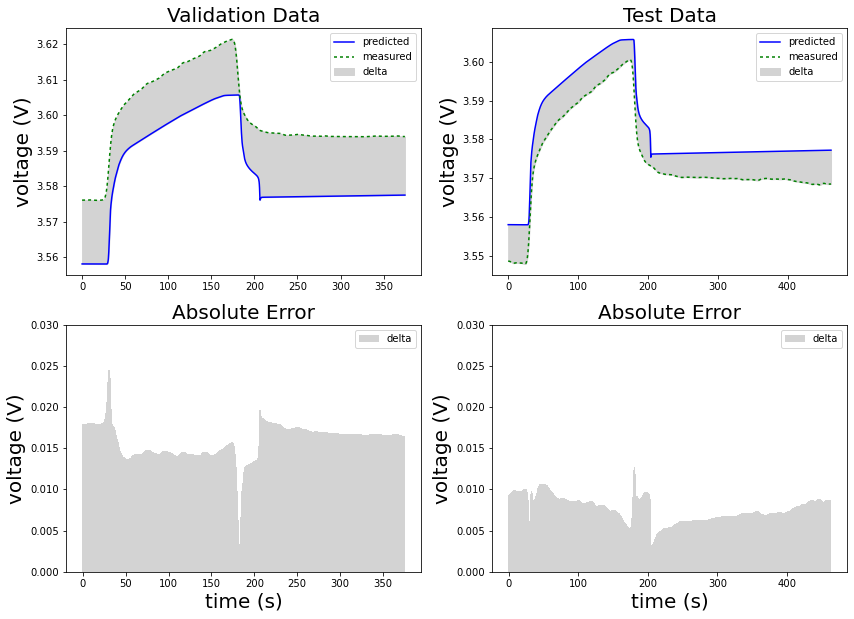

In [6]:
print('Validation Profile:', validation_profile)
print('Test Profile:', test_profile)

yhat_train_unscaled, _, _, _, _, fig = lstm.test(X_train, y_train[:,0], X_validation, y_validation[:,0], X_test, y_test[:,0], scalers_train)

# save plots and predicted sequences
np.save('../../../models/TGDS/' + str(MODEL_ID) + '/predictions', yhat_train_unscaled)
fig.savefig('../../../reports/figures/theory_guided_const-' + str(MODEL_ID) + '-validation&test_profiles.png')

### Prepare Data for Use Cases

In [7]:
TEST_SETS =  np.load('../../../models/TGDS/training_setup/test_sets.npy', allow_pickle=True)
TEST_SETS = TEST_SETS.item()

test_profiles_usecase_1 = TEST_SETS['Reproduction']
test_profiles_usecase_2 = TEST_SETS['Abstraction']
test_profiles_usecase_3 = TEST_SETS['Generalization']

X_case_1, y_case_1, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profiles_usecase_1, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_case_2, y_case_2, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profiles_usecase_2, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_case_3, y_case_3, _ = util.prepare_intermediate_input(HYPER_PARAMS, test_profiles_usecase_3, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])

Input: (1500, 100, 2)  Output/Label: (1500, 2)
Input: (3100, 100, 2)  Output/Label: (3100, 2)
Input: (1600, 100, 2)  Output/Label: (1600, 2)


### Test Model on Use Cases

Use Case 1: ['Profile 10A']
Use Case 2: ['Profile 10A 3x']
Use Case 3: ['Profile -10A']
2922/2922 [==============================] - 165s 56ms/step
Prediction time on Training Set:  164.579s
47/47 [==============================] - 3s 55ms/step
Prediction time on Use Case 1:  2.649s
97/97 [==============================] - 5s 55ms/step
Prediction time on Use Case 2:  5.438s
50/50 [==============================] - 3s 55ms/step
Prediction time on Use Case 3:  2.81s
##############################################################
            Training    Use Case 1    Use Case 2    Use Case 3
--------  ----------  ------------  ------------  ------------
MSE (μV)    113.5         256           482.9         168.3
MAE (V)       0.0099        0.0158        0.0168        0.0118
MaxE (V)      0.0245        0.0245        0.0448        0.0233
##############################################################


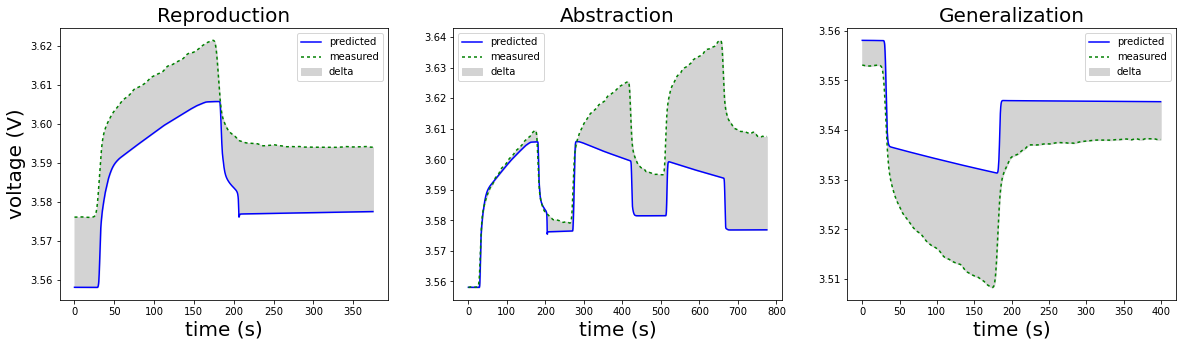

In [8]:
print('Use Case 1:', test_profiles_usecase_1)
print('Use Case 2:', test_profiles_usecase_2)
print('Use Case 3:', test_profiles_usecase_3)

lstm.test_usecases(X_train, y_train[:,0], X_case_1, y_case_1[:,0], X_case_2, y_case_2[:,0], X_case_3, y_case_3[:,0], scalers_train)

In [9]:
# def test_usecase(X_train, y_train, X_case_1, y_case_1, X_case_2, y_case_2, X_case_3, y_case_3, scalers_train):
#     yhat_case_1 = lstm.model.predict(X_case_1, verbose=1)
#     yhat_case_1_unscaled = scalers_train.inverse_transform(yhat_case_1)
#     y_case_1_unscaled = scalers_train.inverse_transform(y_case_1.reshape(-1, 1))

#     yhat_case_2 = lstm.model.predict(X_case_2, verbose=1)
#     yhat_case_2_unscaled = scalers_train.inverse_transform(yhat_case_2)
#     y_case_2_unscaled = scalers_train.inverse_transform(y_case_2.reshape(-1, 1))

#     yhat_case_3 = lstm.model.predict(X_case_3, verbose=1)
#     yhat_case_3_unscaled = scalers_train.inverse_transform(yhat_case_3)
#     y_case_3_unscaled = scalers_train.inverse_transform(y_case_3.reshape(-1, 1))

#     # --------- compute error ---------
#     case_1_mse = metrics.mean_squared_error(y_case_1_unscaled, yhat_case_1_unscaled)
#     case_2_mse = metrics.mean_squared_error(y_case_2_unscaled, yhat_case_2_unscaled)
#     case_3_mse = metrics.mean_squared_error(y_case_3_unscaled, yhat_case_3_unscaled)

#     case_1_mae = metrics.mean_absolute_error(y_case_1_unscaled, yhat_case_1_unscaled)
#     case_2_mae = metrics.mean_absolute_error(y_case_2_unscaled, yhat_case_2_unscaled)
#     case_3_mae = metrics.mean_absolute_error(y_case_3_unscaled, yhat_case_3_unscaled)

#     case_1_max = metrics.max_error(y_case_1_unscaled, yhat_case_1_unscaled)
#     case_2_max = metrics.max_error(y_case_2_unscaled, yhat_case_2_unscaled)
#     case_3_max = metrics.max_error(y_case_3_unscaled, yhat_case_3_unscaled)

#     # --------- visualize results ---------
#     print('##############################################################')
#     error_table = tabulate([['MSE (\u03BCV)', round(case_1_mse, 7) * 1000000, round(case_1_mse, 7) * 1000000, round(case_2_mse, 7) * 1000000, round(case_3_mse, 7) * 1000000], 
#       ['MAE (V)', round(case_1_mae, 4), round(case_1_mae, 4), round(case_2_mae, 4), round(case_3_mae, 4)], 
#       ['MaxE (V)', round(case_1_max, 4), round(case_1_max, 4), round(case_2_max, 4), round(case_3_max, 4)]], headers=['Training', 'Use Case 1', 'Use Case 2', 'Use Case 3'])
#     print(error_table)
#     print('##############################################################')

#     fig,_ = plt.subplots(figsize=(20,5))
#     plt.subplot(1,3,1)
#     time_case_1 = np.arange(yhat_case_1_unscaled.shape[0]) * 0.25
#     plt.plot(time_case_1, yhat_case_1_unscaled, color='blue', label='predicted')
#     plt.plot(time_case_1, y_case_1_unscaled, color='g', dashes=[2, 2], label='measured')
#     plt.fill_between(time_case_1, yhat_case_1_unscaled.flatten(), y_case_1_unscaled.flatten(), label='delta', color='lightgrey')
#     plt.ylabel('voltage (V)', fontsize=20)
#     plt.xlabel('time (s)', fontsize=20)
#     plt.title('Reproduction', fontsize=20)
#     plt.legend()
#     plt.subplot(1,3,2)
#     time_case_2 = np.arange(yhat_case_2_unscaled.shape[0]) * 0.25
#     plt.plot(time_case_2, yhat_case_2_unscaled, color='blue', label='predicted')
#     plt.plot(time_case_2, y_case_2_unscaled, color='g', dashes=[2, 2], label='measured')
#     plt.fill_between(time_case_2, yhat_case_2_unscaled.flatten(), y_case_2_unscaled.flatten(), label='delta', color='lightgrey')
#     plt.xlabel('time (s)', fontsize=20)
#     plt.title('Abstraction', fontsize=20)
#     plt.legend()
#     plt.subplot(1,3,3)
#     time_case_3 = np.arange(yhat_case_3_unscaled.shape[0]) * 0.25
#     plt.plot(time_case_3, yhat_case_3_unscaled, color='blue', label='predicted')
#     plt.plot(time_case_3, y_case_3_unscaled, color='g', dashes=[2, 2], label='measured')
#     plt.fill_between(time_case_3, yhat_case_3_unscaled.flatten(), y_case_3_unscaled.flatten(), label='delta', color='lightgrey')
#     plt.xlabel('time (s)', fontsize=20)
#     plt.title('Generalization', fontsize=20)
#     plt.legend()
#     plt.show()

In [10]:
# test_usecase(X_train, y_train[:,0], X_case_1, y_case_1[:,0], X_case_2, y_case_2[:,0], X_case_3, y_case_3[:,0], scalers_train)